In [1]:
!pip3 install kaggle

  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/b0/8146a4f8dd402f60744fa380bc73ca47303cccf8b9190fd16a827281eac2/certifi-2019.9.11-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e1/c1/bc1dba38b48f4ae3c4428aea669c5e27bd5a7642a74c8348451e0bd8ff86/tqdm-4.36.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/01/11/525b02e4acc0c747de8b6ccdab376331597c569c42ea66ab0a1dbd36eca2/urllib3-1.24.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/pa

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import math
import keras 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
from IPython.core.display import HTML 
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import warnings
from sklearn.neighbors import NearestNeighbors


Using TensorFlow backend.
/home/spider/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/spider/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/spider/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/spider/.local/lib/python3.6/site-packages/tensorflow/python

In [3]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16           4886        141  1.0              
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16           6094        127  0.9411765        
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           3MB  2019-08-21 14:51:34           2243         54  1.0              
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019

In [4]:
#https://www.kaggle.com/bradklassen/pga-tour-20102018-data/downloads/pga-tour-20102018-data.zip/26
!kaggle datasets download bradklassen/pga-tour-20102018-data


pga-tour-20102018-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#Transferring data by changing several location bits.

new_folder = 'data'
old_file_location = os.path.join(os.getcwd(), "pga-tour-20102018-data.zip")
new_file_location = os.path.join(os.getcwd(), new_folder, "pga-tour-20102018-data.zip")

try:
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)
except OSError:
        print ('Error: Creating directory. ' +  new_folder)
        
try:
    if not os.path.exists(new_file_location):
        os.rename(old_file_location, new_file_location)
except OSError:
        print ('Error: Moving file. ' +  new_file_location)       
        
del old_file_location, new_file_location

In [6]:
#Unzipping

zip_file =os.path.join(new_folder, "pga-tour-20102018-data.zip")
new_files_location= os.path.join(os.getcwd(), new_folder)

try:
    with zipfile.ZipFile(zip_file,"r") as zip_ref:
        zip_ref.extractall(new_files_location)
except:
    print("Error during unzipping")
    
del zip_file, new_files_location

In [7]:
data_file_1 = os.path.join(new_folder,'PGA_Data_Historical.csv')
data_file_2 = os.path.join(new_folder,'2020_data.csv')
data_file_3 = os.path.join(new_folder,'2019_data.csv')

print(data_file_1)
print(data_file_2)
print(data_file_3)

del new_folder

data/PGA_Data_Historical.csv
data/2020_data.csv
data/2019_data.csv


In [8]:
df_train_1 = pd.read_csv(data_file_1)
df_train_1.head()

,Player Name,Season,Statistic,Variable,Value
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83
3,Brett Wetterich,2010,Driving Distance,Driving Distance - (ROUNDS),54
4,J.B. Holmes,2010,Driving Distance,Driving Distance - (ROUNDS),100


In [9]:
df_train_2 = pd.read_csv(data_file_2)
df_train_2.head()

,Player Name,Date,Statistic,Variable,Value
0,Kyle Westmoreland,2019-10-13,Driving Distance,Driving Distance - (ROUNDS),2
1,Shintaro Ban,2019-10-13,Driving Distance,Driving Distance - (ROUNDS),2
2,Tony Finau,2019-10-13,Driving Distance,Driving Distance - (ROUNDS),4
3,Davey Jude,2019-10-13,Driving Distance,Driving Distance - (ROUNDS),2
4,Cameron Champ,2019-10-13,Driving Distance,Driving Distance - (ROUNDS),14


In [10]:
df_train_3 = pd.read_csv(data_file_3)
df_train_3.head()

,Player Name,Date,Statistic,Variable,Value
0,Cameron Champ,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),78
1,Rory McIlroy,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),72
2,Luke List,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),66
3,Dustin Johnson,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),73
4,Wyndham Clark,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),87


In [11]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740403 entries, 0 to 2740402
Data columns (total 5 columns):
Player Name    object
Season         int64
Statistic      object
Variable       object
Value          object
dtypes: int64(1), object(4)
memory usage: 104.5+ MB


In [12]:
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327114 entries, 0 to 1327113
Data columns (total 5 columns):
Player Name    1324901 non-null object
Date           1327114 non-null object
Statistic      1327114 non-null object
Variable       1327114 non-null object
Value          1303780 non-null object
dtypes: object(5)
memory usage: 50.6+ MB


In [13]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720529 entries, 0 to 9720528
Data columns (total 5 columns):
Player Name    object
Date           object
Statistic      object
Variable       object
Value          object
dtypes: object(5)
memory usage: 370.8+ MB


In [14]:
#I will use historical data from 2010 - 2018 to be able to make my own ranking and compare with historical.
del df_train_2, df_train_3

In [15]:
categorical_columns = [x for x in df_train_1.dtypes.index if df_train_1.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Player Name', 'source']]
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(df_train_1[col].value_counts())


Frequency of Categories for variable Statistic
Official World Golf Ranking                 53622
Consecutive GIR                             31968
Consecutive Sand Saves                      28956
Lowest Round                                21740
Best YTD Streak w/o a 3-Putt                15984
                                            ...  
Distance Analysis 200-220 yards - 8 Iron        4
Distance Analysis 130-140 yards - 4 Iron        4
Distance Analysis 140-150 yards - 5 Iron        4
Distance Analysis 110-120 yards - 7 Iron        4
Distance Analysis 170-180 yards - 2 Iron        4
Name: Statistic, Length: 528, dtype: int64

Frequency of Categories for variable Variable
Official World Golf Ranking - (AVG POINTS)             8937
Official World Golf Ranking - (TOTAL POINTS)           8937
Official World Golf Ranking - (COUNTRY)                8937
Official World Golf Ranking - (EVENTS)                 8937
Official World Golf Ranking - (POINTS LOST)            8937
            

In [16]:
df_train_1.Statistic.unique()

array(['Driving Distance', 'Driving Accuracy Percentage',
       'Greens in Regulation Percentage', 'Putting Average',
       'Par Breakers', 'Total Eagles', 'Total Birdies',
       'Scoring Average (Actual)', 'Money Leaders',
       'Sand Save Percentage', 'Par 3 Birdie or Better Leaders',
       'Par 4 Birdie or Better Leaders', 'Par 5 Birdie or Better Leaders',
       'Birdie or Better Conversion Percentage', 'Putts Per Round',
       'Scoring Average', 'All-Around Ranking', 'Total Driving',
       'Scrambling', 'Ryder Cup Points', 'PGA Championship Points',
       'Putts made Distance', 'Top 10 Finishes', 'Non-member Earnings',
       'Par 3 Scoring Average', 'Par 4 Scoring Average',
       'Par 5 Scoring Average', "3-Putt Avoidance - 15-20'",
       "3-Putt Avoidance - 20-25'", "3-Putt Avoidance > 25'",
       'Current Par or Better Streak', "Rounds in the 60's",
       'Money per Event Leaders', 'Eagles (Holes per)', 'Birdie Average',
       'World Money List', 'Ball Striking', '

In [17]:
df_train_1_all_columns = df_train_1.set_index(['Player Name', 'Variable', 'Season'])['Value'].unstack('Variable').reset_index()

print("original column count:\t" + str(len(df_train_1.columns)))
print("     new column count:\t" + str(len(df_train_1_all_columns.columns)))

original column count:	5
     new column count:	2083


In [18]:
for col in df_train_1_all_columns.columns: 
    print(col) 

Player Name
Season
% of Potential Pts won - FedExCup Playoffs - (# OF TOP 10'S)
% of Potential Pts won - FedExCup Playoffs - (# OF WINS)
% of Potential Pts won - FedExCup Playoffs - (%)
% of Potential Pts won - FedExCup Playoffs - (EVENTS)
% of Potential Pts won - FedExCup Playoffs - (PLAYOFF POINTS WON)
% of Potential Pts won - FedExCup Playoffs - (POTENTIAL PTS)
% of Potential Pts won - FedExCup Regular Season - (# OF TOP 10'S)
% of Potential Pts won - FedExCup Regular Season - (# OF WINS)
% of Potential Pts won - FedExCup Regular Season - (%)
% of Potential Pts won - FedExCup Regular Season - (EVENTS)
% of Potential Pts won - FedExCup Regular Season - (POINTS WON)
% of Potential Pts won - FedExCup Regular Season - (POTENTIAL PTS)
1-Putts per Round - (AVG)
1-Putts per Round - (ROUNDS)
1-Putts per Round - (TOTAL 1 PUTTS)
1-Putts per Round - (TOTAL ROUNDS)
11-25 Final Round Performance - (# OF TIMES IMPROVED)
11-25 Final Round Performance - (% TIMES IMPROVED)
11-25 Final Round Performa

In [19]:
#Let us see how many players are playing at golf every year


In [20]:
df_train_1_all_columns.Season.value_counts()

2011    1335
2012    1270
2010    1257
2015    1255
2018    1250
2017    1239
2016    1235
2014    1193
2013    1189
Name: Season, dtype: int64

In [21]:
df_train_1test = df_train_1_all_columns[['Player Name', 'Season']].copy()

In [22]:
unique_players_year = [[]]
unique_players_year.append([])
for i in range(2010,2019):
    unique_players_year[0].append(i)
    df_2018 = df_train_1test[df_train_1test.Season==i].rename(columns={"Player Name": "Players"})
    unique_players_year[1].append(df_2018.Players.nunique())

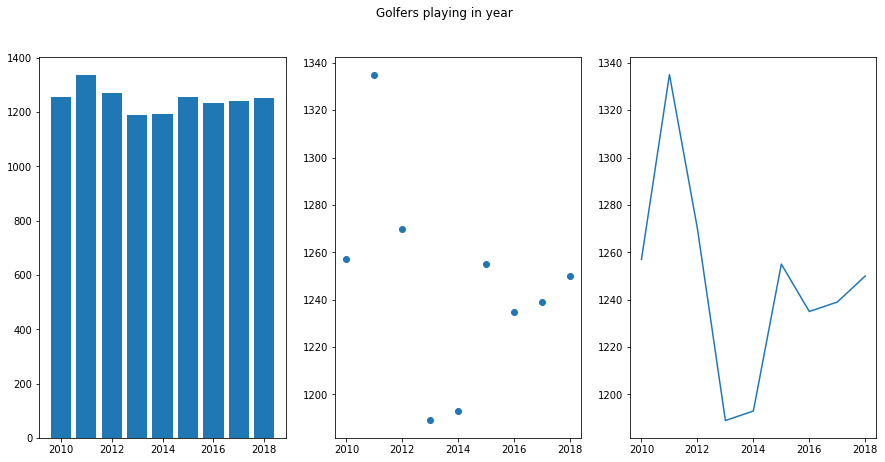

In [23]:
# Number of unique players
names = unique_players_year[0]
values = unique_players_year[1]

plt.figure(figsize=(15, 7))

plt.subplot(131)
plt.bar(unique_players_year[0], unique_players_year[1])
plt.subplot(132)
plt.scatter(unique_players_year[0], unique_players_year[1])
plt.subplot(133)
plt.plot(unique_players_year[0], unique_players_year[1])
plt.suptitle('Golfers playing in year')
plt.show()

In [24]:
#There are enough stable numbers of players in these years to continue data engineering.

In [25]:
'''
Simple strategy: can choose the distance that will be hit and what will be the obstacles like as "hazard"
or "rough" on the ball flight path.

hazard - bunkers, are natural obstacles.
rough - higher, thicker grass or naturally growing.


Images from website: https://thefriedegg.com/golf-course-architecture-strategy-width/    
'''

Image(url= "https://43n98k41i1ee1kdt4e4bvlu6-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/GCA101Strategy-SweetensDiagram.png") 

In [26]:
Image(url= "https://43n98k41i1ee1kdt4e4bvlu6-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/GCA101Strategy-Streamsong15Diagram.png") 

In [27]:
'''
Great face-strike quality is a huge contributor to this – hitting closer to the sweet spot
gets more of the energy from the clubhead into the ball and also improve accuracy.


Images from website: https://www.adamyounggolf.com/the-5-ball-flight-laws-for-golf/
'''

'\nGreat face-strike quality is a huge contributor to this – hitting closer to the sweet spot\ngets more of the energy from the clubhead into the ball and also improve accuracy.\n\n\nImages from website: https://www.adamyounggolf.com/the-5-ball-flight-laws-for-golf/\n'

In [28]:
Image(url= "https://www.adamyounggolf.com/wp-content/uploads/2018/05/Face-Strike-Front.jpg") 

In [29]:
#The strike on the face has a massive effect on the spin rate with a driver (one type of golf club).
Image(url= "https://www.adamyounggolf.com/wp-content/uploads/2019/05/driver-face-strike-spin-rate.jpg") 

In [30]:
'''
Assumptions:
-The error from the "worse day" at the player is ignored by averaging the results
-There is no deterioration inaccuracy due to stress-induced on the last few holes.

Hypothesis 1:
-The choice of distance affects the selection and effectiveness of strokes in golf clubs classes.

'''

'\nAssumptions:\n-The error from the "worse day" at the player is ignored by averaging the results\n-There is no deterioration inaccuracy due to stress-induced on the last few holes.\n\nHypothesis 1:\n-The choice of distance affects the selection and effectiveness of strokes in golf clubs classes.\n\n'

In [31]:
df_data_test_1 = df_train_1_all_columns[['Player Name', 'Season', 'Distance Analysis 100-110 yards - 5 Iron - (%)',
'Distance Analysis 100-110 yards - 5 Iron - (ROUNDS)',
'Distance Analysis 100-110 yards - 5 Iron - (TOTAL ATTEMPTS DIST RANGE)',
'Distance Analysis 100-110 yards - 5 Iron - (TOTAL ATTEMPTS WITH CLUB)',
'Distance Analysis 100-110 yards - 9 Iron - (%)',
'Distance Analysis 100-110 yards - 9 Iron - (ROUNDS)',
'Distance Analysis 100-110 yards - 9 Iron - (TOTAL ATTEMPTS DIST RANGE)',
'Distance Analysis 100-110 yards - 9 Iron - (TOTAL ATTEMPTS WITH CLUB)',
'Distance Analysis 100-110 yards - Driver - (%)',
'Distance Analysis 100-110 yards - Driver - (ROUNDS)',
'Distance Analysis 100-110 yards - Driver - (TOTAL ATTEMPTS DIST RANGE)',
'Distance Analysis 100-110 yards - Driver - (TOTAL ATTEMPTS WITH CLUB)',
'Distance Analysis 100-110 yards - Fairway Wood - (%)',
'Distance Analysis 100-110 yards - Fairway Wood - (ROUNDS)',
'Distance Analysis 100-110 yards - Fairway Wood - (TOTAL ATTEMPTS DIST RANGE)',
'Distance Analysis 100-110 yards - Fairway Wood - (TOTAL ATTEMPTS WITH CLUB)',
'Distance Analysis 100-110 yards - Wedges - (%)',
'Distance Analysis 100-110 yards - Wedges - (ROUNDS)',
'Distance Analysis 100-110 yards - Wedges - (TOTAL ATTEMPTS DIST RANGE)',
'Distance Analysis 100-110 yards - Wedges - (TOTAL ATTEMPTS WITH CLUB)',
'Distance Analysis 110-120 yards - 7 Iron - (%)',
'Distance Analysis 110-120 yards - 7 Iron - (ROUNDS)',
'Distance Analysis 110-120 yards - 7 Iron - (TOTAL ATTEMPTS DIST RANGE)',
'Distance Analysis 110-120 yards - 7 Iron - (TOTAL ATTEMPTS WITH CLUB)',
'Distance Analysis 110-120 yards - 9 Iron - (%)',
'Distance Analysis 110-120 yards - 9 Iron - (ROUNDS)',
'Distance Analysis 110-120 yards - 9 Iron - (TOTAL ATTEMPTS DIST RANGE)',
'Distance Analysis 110-120 yards - 9 Iron - (TOTAL ATTEMPTS WITH CLUB)',
'Distance Analysis 110-120 yards - Driver - (%)',
'Distance Analysis 110-120 yards - Driver - (ROUNDS)',
'Distance Analysis 110-120 yards - Driver - (TOTAL ATTEMPTS DIST RANGE)',
'Distance Analysis 110-120 yards - Driver - (TOTAL ATTEMPTS WITH CLUB)']].copy()
df_data_test_1 = df_data_test_1.rename(columns={"Player Name": "Players"})
df_data_test_1

Variable,Players,Season,Distance Analysis 100-110 yards - 5 Iron - (%),Distance Analysis 100-110 yards - 5 Iron - (ROUNDS),Distance Analysis 100-110 yards - 5 Iron - (TOTAL ATTEMPTS DIST RANGE),Distance Analysis 100-110 yards - 5 Iron - (TOTAL ATTEMPTS WITH CLUB),Distance Analysis 100-110 yards - 9 Iron - (%),Distance Analysis 100-110 yards - 9 Iron - (ROUNDS),Distance Analysis 100-110 yards - 9 Iron - (TOTAL ATTEMPTS DIST RANGE),Distance Analysis 100-110 yards - 9 Iron - (TOTAL ATTEMPTS WITH CLUB),...,Distance Analysis 110-120 yards - 7 Iron - (TOTAL ATTEMPTS DIST RANGE),Distance Analysis 110-120 yards - 7 Iron - (TOTAL ATTEMPTS WITH CLUB),Distance Analysis 110-120 yards - 9 Iron - (%),Distance Analysis 110-120 yards - 9 Iron - (ROUNDS),Distance Analysis 110-120 yards - 9 Iron - (TOTAL ATTEMPTS DIST RANGE),Distance Analysis 110-120 yards - 9 Iron - (TOTAL ATTEMPTS WITH CLUB),Distance Analysis 110-120 yards - Driver - (%),Distance Analysis 110-120 yards - Driver - (ROUNDS),Distance Analysis 110-120 yards - Driver - (TOTAL ATTEMPTS DIST RANGE),Distance Analysis 110-120 yards - Driver - (TOTAL ATTEMPTS WITH CLUB)
0,A.J. McInerney,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Baddeley,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Baddeley,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aaron Baddeley,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aaron Baddeley,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Aaron Baddeley,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aaron Baddeley,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aaron Baddeley,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Aaron Baddeley,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aaron Baddeley,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_data_test_1.isnull().sum()

Variable
Players                                                                             0
Season                                                                              0
Distance Analysis 100-110 yards - 5 Iron - (%)                                  11222
Distance Analysis 100-110 yards - 5 Iron - (ROUNDS)                             11222
Distance Analysis 100-110 yards - 5 Iron - (TOTAL ATTEMPTS DIST RANGE)          11222
Distance Analysis 100-110 yards - 5 Iron - (TOTAL ATTEMPTS WITH CLUB)           11222
Distance Analysis 100-110 yards - 9 Iron - (%)                                  11221
Distance Analysis 100-110 yards - 9 Iron - (ROUNDS)                             11221
Distance Analysis 100-110 yards - 9 Iron - (TOTAL ATTEMPTS DIST RANGE)          11221
Distance Analysis 100-110 yards - 9 Iron - (TOTAL ATTEMPTS WITH CLUB)           11221
Distance Analysis 100-110 yards - Driver - (%)                                  11214
Distance Analysis 100-110 yards - Driver - (R

In [33]:
df_data_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11223 entries, 0 to 11222
Data columns (total 34 columns):
Players                                                                         11223 non-null object
Season                                                                          11223 non-null int64
Distance Analysis 100-110 yards - 5 Iron - (%)                                  1 non-null object
Distance Analysis 100-110 yards - 5 Iron - (ROUNDS)                             1 non-null object
Distance Analysis 100-110 yards - 5 Iron - (TOTAL ATTEMPTS DIST RANGE)          1 non-null object
Distance Analysis 100-110 yards - 5 Iron - (TOTAL ATTEMPTS WITH CLUB)           1 non-null object
Distance Analysis 100-110 yards - 9 Iron - (%)                                  2 non-null object
Distance Analysis 100-110 yards - 9 Iron - (ROUNDS)                             2 non-null object
Distance Analysis 100-110 yards - 9 Iron - (TOTAL ATTEMPTS DIST RANGE)          2 non-null object
Di

In [34]:
#In this data, there are not enough rows to learn machine learning model.

In [35]:
'''
Hypothesis2:
-Choosing the hitting distance and amount of attempts it might describe the playing style of each player.

'''

'\nHypothesis2:\n-Choosing the hitting distance and amount of attempts it might describe the playing style of each player.\n\n'

In [36]:
df_data = df_train_1_all_columns[['Player Name', "Season",'Approaches from 50-75 yards (Rgh) - (# OF ATTEMPTS)',
'Approaches from 50-75 yards (Rgh) - (RELATIVE TO PAR)',
'Approaches from 50-75 yards - (# OF ATTEMPTS)',
'Approaches from 50-75 yards - (RELATIVE TO PAR)',
'Approaches from 75-100 yards (Rgh) - (# OF ATTEMPTS)',
'Approaches from 75-100 yards (Rgh) - (RELATIVE TO PAR)',
'Approaches from 75-100 yards - (# OF ATTEMPTS)',
'Approaches from 75-100 yards - (RELATIVE TO PAR)',
'Approaches from 100-125 yards (Rgh) - (# OF ATTEMPTS)',
'Approaches from 100-125 yards (Rgh) - (RELATIVE TO PAR)',
'Approaches from 100-125 yards - (# OF ATTEMPTS)',
'Approaches from 100-125 yards - (RELATIVE TO PAR)',
'Approaches from 125-150 yards (Rgh) - (# OF ATTEMPTS)',
'Approaches from 125-150 yards (Rgh) - (RELATIVE TO PAR)',
'Approaches from 125-150 yards - (# OF ATTEMPTS)',
'Approaches from 125-150 yards - (RELATIVE TO PAR)',
'Approaches from 150-175 yards (Rgh) - (# OF ATTEMPTS)',
'Approaches from 150-175 yards (Rgh) - (RELATIVE TO PAR)',
'Approaches from 150-175 yards - (# OF ATTEMPTS)',
'Approaches from 150-175 yards - (RELATIVE TO PAR)',
'Approaches from 175-200 yards (Rgh) - (# OF ATTEMPTS)',
'Approaches from 175-200 yards (Rgh) - (RELATIVE TO PAR)',
'Approaches from 175-200 yards - (# OF ATTEMPTS)',
'Approaches from 175-200 yards - (RELATIVE TO PAR)',
'Approaches from 200-225 yards (Rgh) - (# OF ATTEMPTS)',
'Approaches from 200-225 yards (Rgh) - (RELATIVE TO PAR)',
'Approaches from 200-225 yards - (# OF ATTEMPTS)',
'Approaches from 200-225 yards - (RELATIVE TO PAR)',
'Approaches from 225-250 yards (Rgh) - (# OF ATTEMPTS)',
'Approaches from 225-250 yards (Rgh) - (RELATIVE TO PAR)',
'Approaches from 225-250 yards - (# OF ATTEMPTS)',
'Approaches from 225-250 yards - (RELATIVE TO PAR)',
'Approaches from 250-275 yards (Rgh) - (# OF ATTEMPTS)',
'Approaches from 250-275 yards (Rgh) - (RELATIVE TO PAR)',
'Approaches from 250-275 yards - (# OF ATTEMPTS)',
'Approaches from 250-275 yards - (RELATIVE TO PAR)']].copy()

In [37]:
#E means the player hits the same number times as is hole 'par'. It gives him 0 points.
df_data = df_data.replace({'E': 0})
df_data.head()

Variable,Player Name,Season,Approaches from 50-75 yards (Rgh) - (# OF ATTEMPTS),Approaches from 50-75 yards (Rgh) - (RELATIVE TO PAR),Approaches from 50-75 yards - (# OF ATTEMPTS),Approaches from 50-75 yards - (RELATIVE TO PAR),Approaches from 75-100 yards (Rgh) - (# OF ATTEMPTS),Approaches from 75-100 yards (Rgh) - (RELATIVE TO PAR),Approaches from 75-100 yards - (# OF ATTEMPTS),Approaches from 75-100 yards - (RELATIVE TO PAR),...,Approaches from 200-225 yards - (# OF ATTEMPTS),Approaches from 200-225 yards - (RELATIVE TO PAR),Approaches from 225-250 yards (Rgh) - (# OF ATTEMPTS),Approaches from 225-250 yards (Rgh) - (RELATIVE TO PAR),Approaches from 225-250 yards - (# OF ATTEMPTS),Approaches from 225-250 yards - (RELATIVE TO PAR),Approaches from 250-275 yards (Rgh) - (# OF ATTEMPTS),Approaches from 250-275 yards (Rgh) - (RELATIVE TO PAR),Approaches from 250-275 yards - (# OF ATTEMPTS),Approaches from 250-275 yards - (RELATIVE TO PAR)
0,A.J. McInerney,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Baddeley,2010,19,0,34,0,20,-4,72,-10,...,135,-3,21,-1,70,-25,17,-9,30,-16
2,Aaron Baddeley,2011,20,-1,18,+1,11,+7,41,-16,...,112,-8,15,-5,53,-6,11,-3,24,-18
3,Aaron Baddeley,2012,15,+2,22,-7,14,+3,45,-12,...,88,-1,7,+1,48,-3,9,-4,12,-7
4,Aaron Baddeley,2013,10,+4,17,+4,14,0,39,-7,...,79,+3,8,-7,43,-1,11,-7,18,-5


In [38]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11223 entries, 0 to 11222
Data columns (total 38 columns):
Player Name                                                11223 non-null object
Season                                                     11223 non-null int64
Approaches from 50-75 yards (Rgh) - (# OF ATTEMPTS)        1676 non-null object
Approaches from 50-75 yards (Rgh) - (RELATIVE TO PAR)      1676 non-null object
Approaches from 50-75 yards - (# OF ATTEMPTS)              1678 non-null object
Approaches from 50-75 yards - (RELATIVE TO PAR)            1678 non-null object
Approaches from 75-100 yards (Rgh) - (# OF ATTEMPTS)       1677 non-null object
Approaches from 75-100 yards (Rgh) - (RELATIVE TO PAR)     1677 non-null object
Approaches from 75-100 yards - (# OF ATTEMPTS)             1678 non-null object
Approaches from 75-100 yards - (RELATIVE TO PAR)           1678 non-null object
Approaches from 100-125 yards (Rgh) - (# OF ATTEMPTS)      1678 non-null object
Approaches

In [39]:
df_data = df_data.dropna(thresh = 9)

In [40]:
df_data = df_data.fillna(0)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 11218
Data columns (total 38 columns):
Player Name                                                1678 non-null object
Season                                                     1678 non-null int64
Approaches from 50-75 yards (Rgh) - (# OF ATTEMPTS)        1678 non-null object
Approaches from 50-75 yards (Rgh) - (RELATIVE TO PAR)      1678 non-null object
Approaches from 50-75 yards - (# OF ATTEMPTS)              1678 non-null object
Approaches from 50-75 yards - (RELATIVE TO PAR)            1678 non-null object
Approaches from 75-100 yards (Rgh) - (# OF ATTEMPTS)       1678 non-null object
Approaches from 75-100 yards (Rgh) - (RELATIVE TO PAR)     1678 non-null object
Approaches from 75-100 yards - (# OF ATTEMPTS)             1678 non-null object
Approaches from 75-100 yards - (RELATIVE TO PAR)           1678 non-null object
Approaches from 100-125 yards (Rgh) - (# OF ATTEMPTS)      1678 non-null object
Approaches fr

In [41]:
df_data

Variable,Player Name,Season,Approaches from 50-75 yards (Rgh) - (# OF ATTEMPTS),Approaches from 50-75 yards (Rgh) - (RELATIVE TO PAR),Approaches from 50-75 yards - (# OF ATTEMPTS),Approaches from 50-75 yards - (RELATIVE TO PAR),Approaches from 75-100 yards (Rgh) - (# OF ATTEMPTS),Approaches from 75-100 yards (Rgh) - (RELATIVE TO PAR),Approaches from 75-100 yards - (# OF ATTEMPTS),Approaches from 75-100 yards - (RELATIVE TO PAR),...,Approaches from 200-225 yards - (# OF ATTEMPTS),Approaches from 200-225 yards - (RELATIVE TO PAR),Approaches from 225-250 yards (Rgh) - (# OF ATTEMPTS),Approaches from 225-250 yards (Rgh) - (RELATIVE TO PAR),Approaches from 225-250 yards - (# OF ATTEMPTS),Approaches from 225-250 yards - (RELATIVE TO PAR),Approaches from 250-275 yards (Rgh) - (# OF ATTEMPTS),Approaches from 250-275 yards (Rgh) - (RELATIVE TO PAR),Approaches from 250-275 yards - (# OF ATTEMPTS),Approaches from 250-275 yards - (RELATIVE TO PAR)
1,Aaron Baddeley,2010,19,0,34,0,20,-4,72,-10,...,135,-3,21,-1,70,-25,17,-9,30,-16
2,Aaron Baddeley,2011,20,-1,18,+1,11,+7,41,-16,...,112,-8,15,-5,53,-6,11,-3,24,-18
3,Aaron Baddeley,2012,15,+2,22,-7,14,+3,45,-12,...,88,-1,7,+1,48,-3,9,-4,12,-7
4,Aaron Baddeley,2013,10,+4,17,+4,14,0,39,-7,...,79,+3,8,-7,43,-1,11,-7,18,-5
5,Aaron Baddeley,2014,9,+1,9,+3,12,+1,36,-2,...,77,+4,12,-4,52,-7,5,-2,25,-10
6,Aaron Baddeley,2015,6,+3,20,0,10,-2,37,-1,...,94,-10,11,-6,45,-11,8,-4,25,-11
7,Aaron Baddeley,2016,15,0,21,+1,18,+10,42,-10,...,114,+4,12,-4,57,-19,9,-6,19,-14
8,Aaron Baddeley,2017,8,-1,10,0,12,-4,42,-1,...,66,-2,5,0,29,+3,5,-2,20,-12
9,Aaron Baddeley,2018,14,+7,22,+1,14,+1,44,0,...,90,+9,11,-3,44,-18,3,0,25,-13
30,Aaron Watkins,2013,7,+3,16,+3,5,+1,36,-10,...,57,+5,5,-1,23,+4,0,0,6,-3


In [42]:
df_data_temp = df_data
data_names = df_data_temp['Player Name'].to_numpy()
df_data_temp = df_data_temp.drop(['Player Name'], axis=1)
df_data_temp = df_data_temp.astype('int32', copy=False)
data_records = df_data_temp.to_numpy()

In [43]:
data_names

array(['Aaron Baddeley', 'Aaron Baddeley', 'Aaron Baddeley', ...,
       'Zach Johnson', 'Zack Miller', 'Zecheng Dou'], dtype=object)

In [44]:
data_records

array([[2010,   19,    0, ...,   -9,   30,  -16],
       [2011,   20,   -1, ...,   -3,   24,  -18],
       [2012,   15,    2, ...,   -4,   12,   -7],
       ...,
       [2018,   12,    6, ...,   -1,   28,  -13],
       [2011,   14,    6, ...,   -2,   25,  -11],
       [2018,   10,   -1, ...,   -3,   12,   -7]], dtype=int32)

In [45]:
'''
From 50-75 yards average distance is 63 yards.
From 75-100 yards average distance is 88 yards.
From 100-125 yards average distance is 113 yards.
From 125-150 yards average distance is 138 yards.
From 150-175 yards average distance is 163 yards.
From 175-200 yards average distance is 188 yards.
From 200-225 yards average distance is 213 yards.
From 225-250 yards average distance is 238 yards.
From 250-275 yards average distance is 263 yards.
'''

'\nFrom 50-75 yards average distance is 63 yards.\nFrom 75-100 yards average distance is 88 yards.\nFrom 100-125 yards average distance is 113 yards.\nFrom 125-150 yards average distance is 138 yards.\nFrom 150-175 yards average distance is 163 yards.\nFrom 175-200 yards average distance is 188 yards.\nFrom 200-225 yards average distance is 213 yards.\nFrom 225-250 yards average distance is 238 yards.\nFrom 250-275 yards average distance is 263 yards.\n'

In [46]:
data_prepare_style=[]
data_prepare_skills=[]
data_prepare_skills_2d=[]
for k in range(len(data_records)):
    a=0 #sum
    b=0 #yards
    c=0 #y rgh
    c1=0 #sum rgh
    d=0 # y1
    d1=0 #sum 
    for i in range(18):
        for j in range(data_records[k][1+ (i*2)]):
            a = a + 1
            b = b + data_records[0][2+ (i*2)] 
            if(i%2 == 0):
                c = c + (63+(i//2)*25)
                c1 = c1 +1
            else:
                d = d + (63+(i//2)*25)
                d1 = d1 +1

    data_prepare_style.append([b/a])
    data_prepare_skills_2d.append([d/d1, c/c1])

In [47]:
data_prepare_skills_2d_np =np.asarray(data_prepare_skills_2d)
data_prepare_style_np =np.asarray(data_prepare_style)
normalized_data_prepare_skills_2d_np = preprocessing.scale(data_prepare_skills_2d_np)
scaler = MinMaxScaler()
scaler.fit(normalized_data_prepare_skills_2d_np)
MinMaxScaler(copy=True, feature_range=(0, 1))
data_prepare_skills_2d_np = scaler.transform(normalized_data_prepare_skills_2d_np)

In [48]:
data_prepare_style_np = data_prepare_style_np.astype('float32', copy=False)

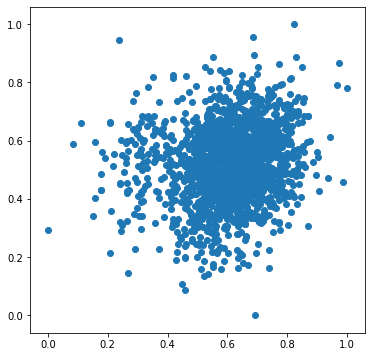

In [49]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(data_prepare_skills_2d_np[:,0], data_prepare_skills_2d_np[:,1])
plt.show()

In [50]:
#Because of a lot of outliers and small amount records I choose k means algorithm.

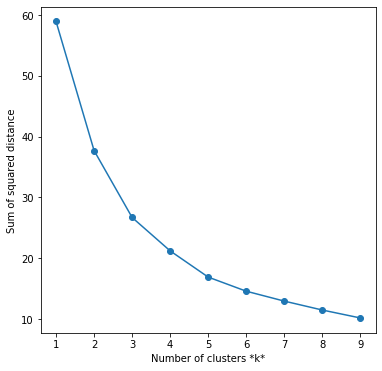

In [51]:
#Elbow Method
#Code from: ImadDabbura/kmeans_plot_elbow.py
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data_prepare_skills_2d_np)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [52]:
#From Elbow method. There is no significantly better value for k means algorithm.

For n_clusters = 2 The average silhouette_score is : 0.3363834522679597
For n_clusters = 3 The average silhouette_score is : 0.34542711765565887
For n_clusters = 4 The average silhouette_score is : 0.3185157366530802
For n_clusters = 5 The average silhouette_score is : 0.33458588724743676
For n_clusters = 6 The average silhouette_score is : 0.31731149114031965
For n_clusters = 7 The average silhouette_score is : 0.31465092109603576
For n_clusters = 8 The average silhouette_score is : 0.32593298792530556
For n_clusters = 9 The average silhouette_score is : 0.33247467992648805
For n_clusters = 10 The average silhouette_score is : 0.33027815384938813


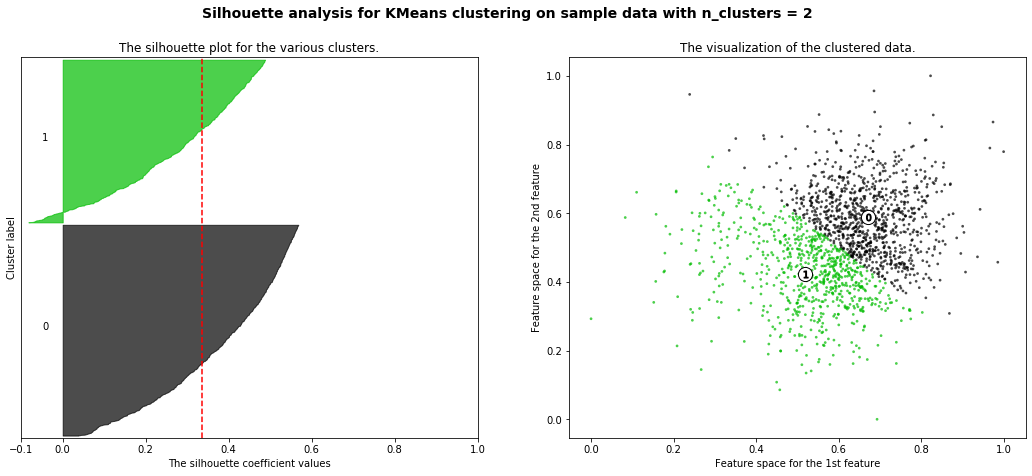

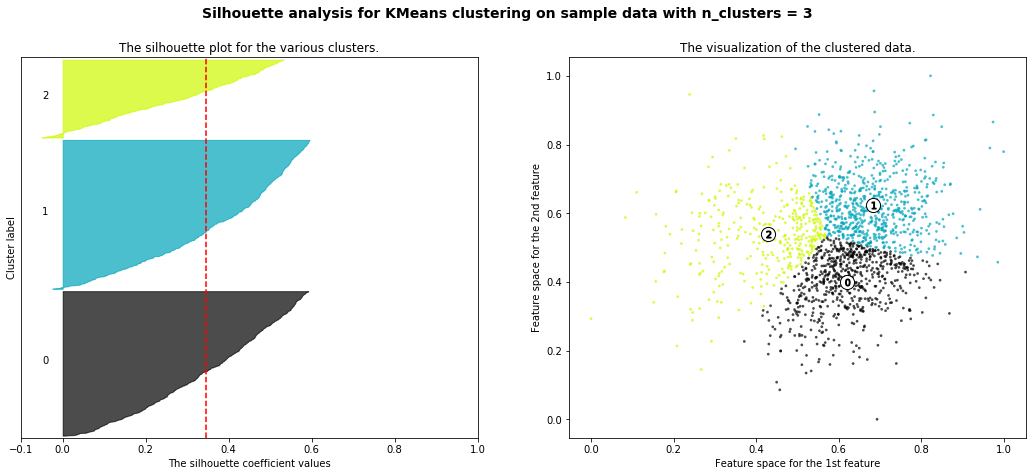

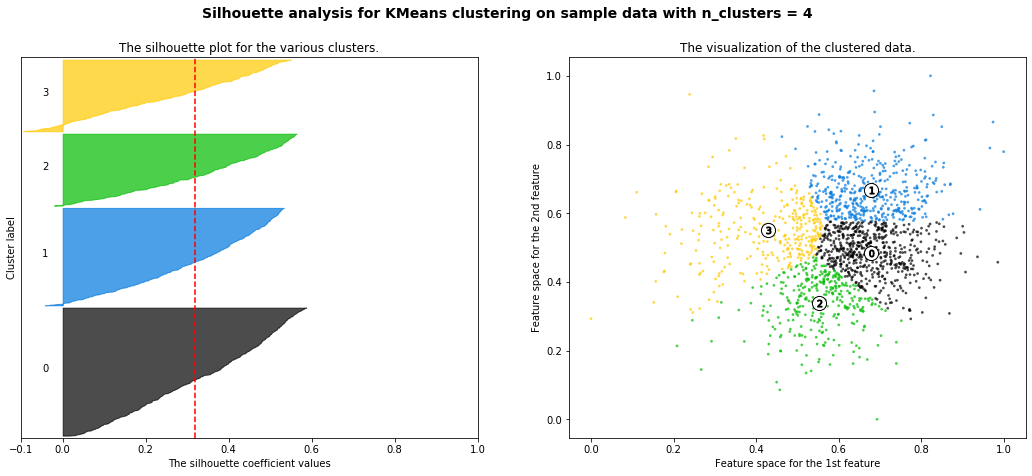

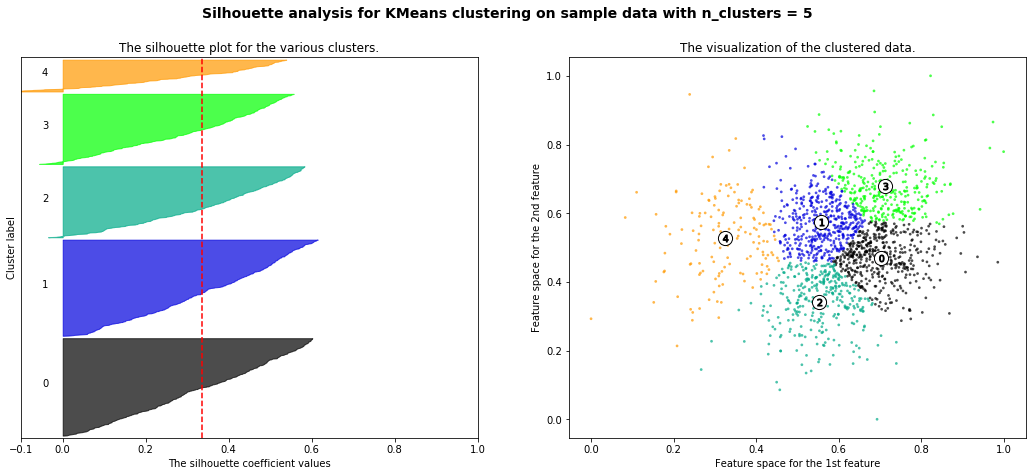

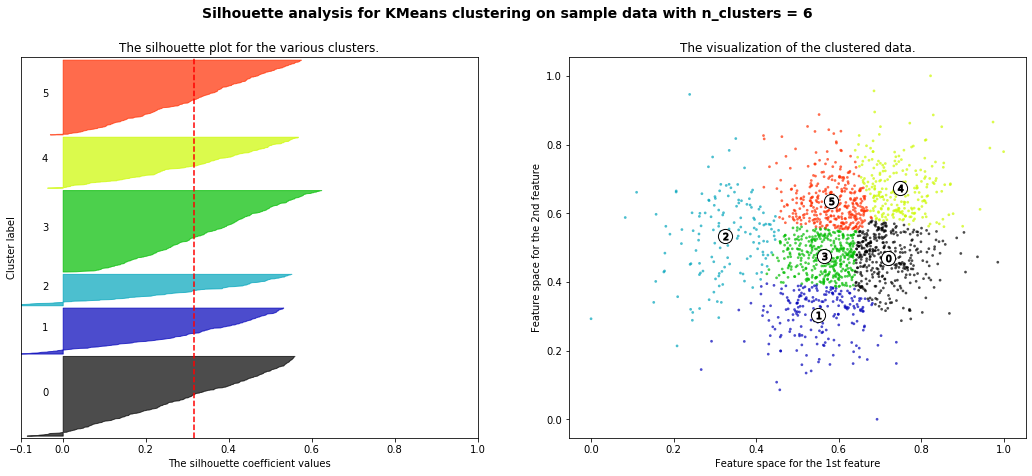

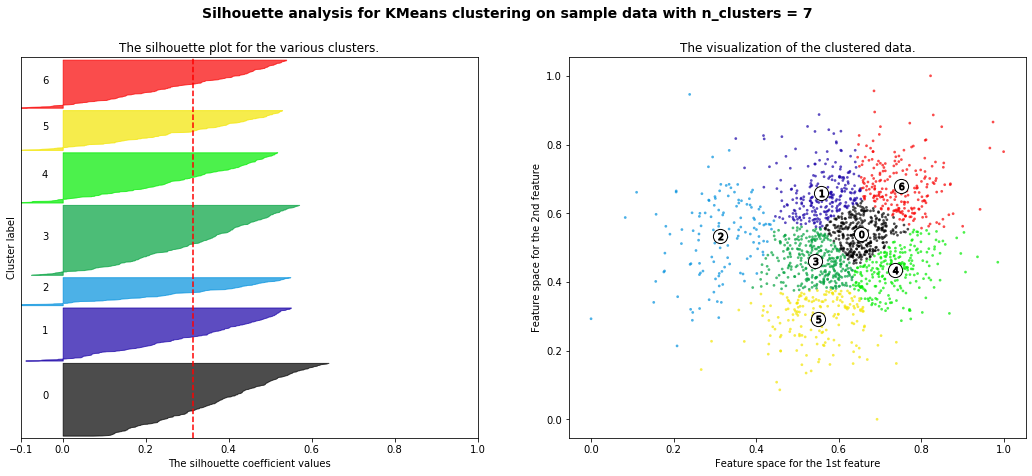

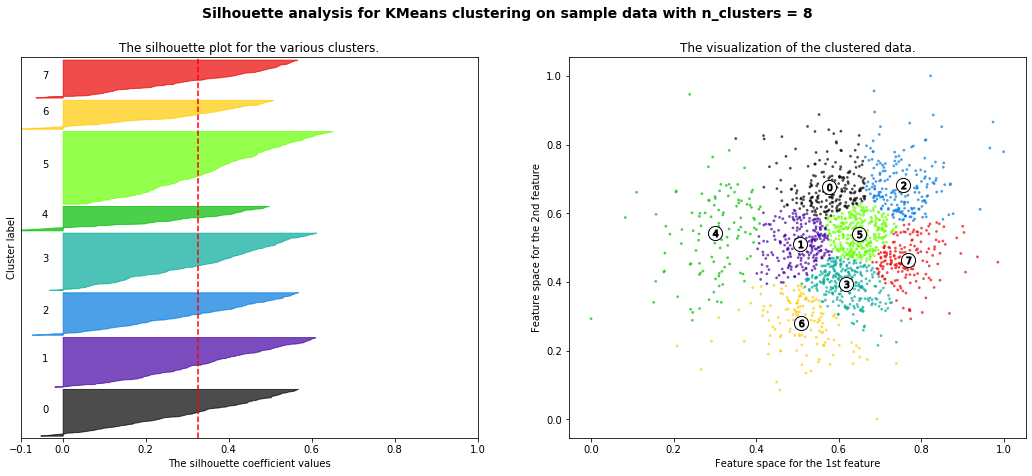

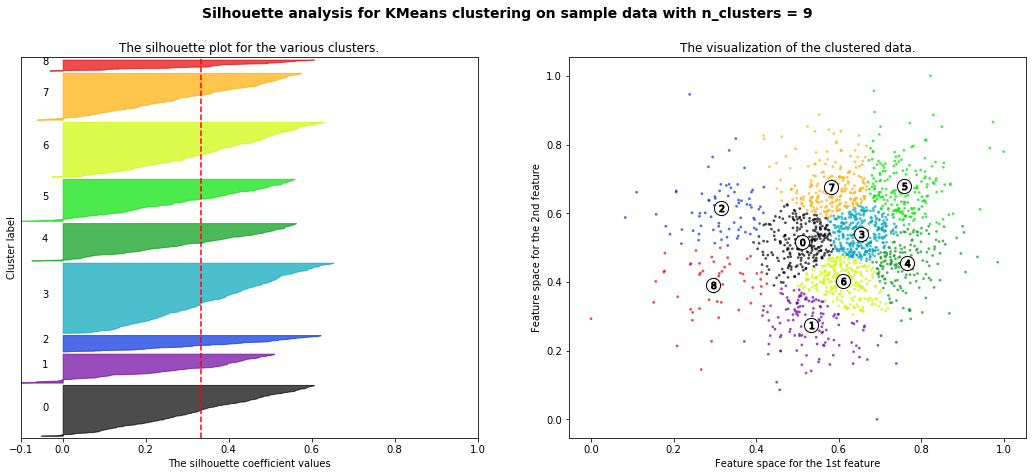

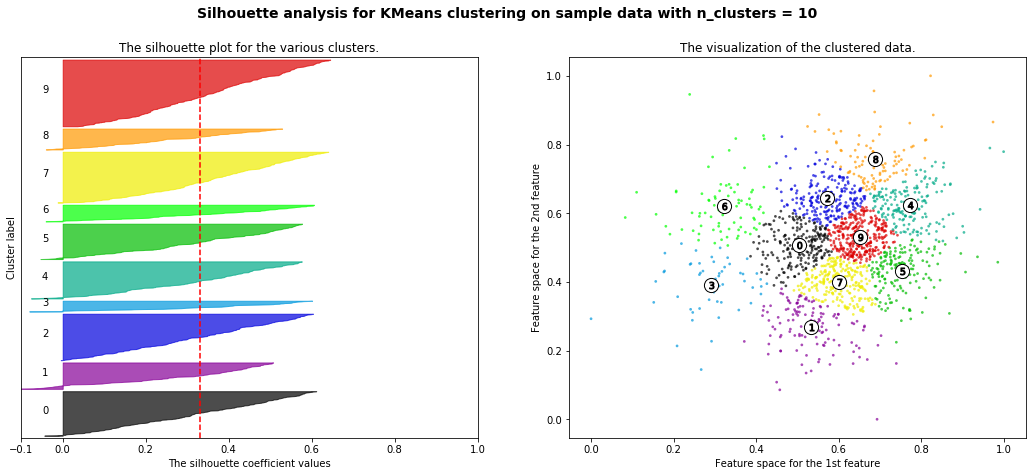

In [53]:
#Code from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = data_prepare_skills_2d_np
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [54]:
#The best-looking value is k = 3

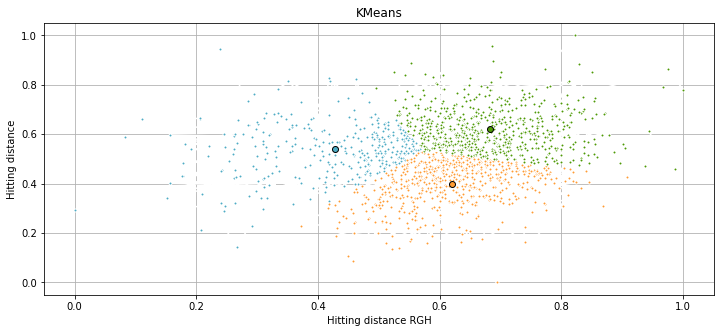

In [55]:
#Code from: https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#example-cluster-plot-mini-batch-kmeans-py
import time

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
np.random.seed(0)

batch_size = 24
n_clusters = 3
X =data_prepare_skills_2d_np

##############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=5)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

##############################################################################
# Plot result

colors = ['#4EACC5', '#FF9C34', '#4E9A06']
plt.figure(figsize=(12, 5))
#plt.hold(True)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
plt.title('KMeans')    
plt.grid(True)
plt.xlabel('Hitting distance RGH',fontsize=10)
plt.ylabel('Hitting distance',fontsize=10)
plt.show()


In [56]:
k_means_labels

array([2, 2, 1, ..., 1, 1, 1], dtype=int32)

In [57]:
data_prepare_style_np

array([[-3.6075768],
       [-2.9740777],
       [-3.1498296],
       ...,
       [-3.9439251],
       [-3.2673752],
       [-3.1635435]], dtype=float32)

In [58]:
df_data["Style"] = k_means_labels

In [59]:
df_data["Ranking"] = data_prepare_style_np

In [60]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 11218
Data columns (total 40 columns):
Player Name                                                1678 non-null object
Season                                                     1678 non-null int64
Approaches from 50-75 yards (Rgh) - (# OF ATTEMPTS)        1678 non-null object
Approaches from 50-75 yards (Rgh) - (RELATIVE TO PAR)      1678 non-null object
Approaches from 50-75 yards - (# OF ATTEMPTS)              1678 non-null object
Approaches from 50-75 yards - (RELATIVE TO PAR)            1678 non-null object
Approaches from 75-100 yards (Rgh) - (# OF ATTEMPTS)       1678 non-null object
Approaches from 75-100 yards (Rgh) - (RELATIVE TO PAR)     1678 non-null object
Approaches from 75-100 yards - (# OF ATTEMPTS)             1678 non-null object
Approaches from 75-100 yards - (RELATIVE TO PAR)           1678 non-null object
Approaches from 100-125 yards (Rgh) - (# OF ATTEMPTS)      1678 non-null object
Approaches fr

In [61]:
df_data_all = df_data[['Player Name','Season', 'Style', 'Ranking']].copy()
df_data_0 = df_data_all[df_data_all.Style == 0]
df_data_1 = df_data_all[df_data_all.Style == 1]
df_data_2 = df_data_all[df_data_all.Style == 2]

In [62]:
#Sorted data frame by ranking with players from the first cluster
df_data_0 = df_data_0.sort_values(by=['Ranking'])
df_data_0.head(10)

Variable,Player Name,Season,Style,Ranking
2282,Colt Knost,2016,0,-6.162218
8926,Russell Knox,2016,0,-5.991021
242,Alex Cejka,2016,0,-5.903900
8736,Roberto Castro,2016,0,-5.815360
4550,Jason Bohn,2016,0,-5.776808
1129,Boo Weekley,2016,0,-5.762287
5644,K.J. Choi,2016,0,-5.725490
9667,Si Woo Kim,2016,0,-5.605498
9568,Shane Lowry,2016,0,-5.579365
4827,Jerry Kelly,2016,0,-5.551971


In [63]:
#Sorted data frame by ranking with players from the second cluster
df_data_1 = df_data_1.sort_values(by=['Ranking'])
df_data_1.head(10)

Variable,Player Name,Season,Style,Ranking
11164,Zac Blair,2016,1,-5.782931
8858,Rory McIlroy,2016,1,-5.524465
9372,Scott Pinckney,2016,1,-5.161515
9924,Steve Wheatcroft,2018,1,-4.830667
1949,Chez Reavie,2018,1,-4.685917
2883,David Toms,2012,1,-4.678426
1946,Chez Reavie,2015,1,-4.676259
35,Aaron Wise,2018,1,-4.669796
5224,Jon Rahm,2017,1,-4.661050
5225,Jon Rahm,2018,1,-4.647500


In [64]:
#Sorted data frame by ranking with players from the third cluster
df_data_2 = df_data_2.sort_values(by=['Ranking'])
df_data_2.head(10)

Variable,Player Name,Season,Style,Ranking
4890,Jim Furyk,2016,2,-5.847291
7978,Paul Casey,2016,2,-5.737113
3683,Graeme McDowell,2016,2,-5.419094
2609,Danny Lee,2016,2,-5.318902
10989,William McGirt,2016,2,-5.124275
3949,Hideki Matsuyama,2016,2,-5.101990
9500,Sergio Garcia,2016,2,-5.089109
3314,Fabian Gomez,2016,2,-4.869960
5113,John Huh,2016,2,-4.853868
4873,Jhonattan Vegas,2016,2,-4.772197


In [65]:
#Ranking test


In [66]:
#Sorted data frame by ranking with players from the all clusters 
df_test_ranking = df_train_1_all_columns[['Player Name','Season', 'Scoring Average - (AVG)']].copy()
df_test_ranking = df_test_ranking[df_test_ranking.Season == 2016]
df_test_ranking = df_test_ranking.sort_values(by=['Scoring Average - (AVG)'])
df_test_ranking.head(10)

Variable,Player Name,Season,Scoring Average - (AVG)
3110,Dustin Johnson,2016,69.172
4561,Jason Day,2016,69.313
105,Adam Scott,2016,69.470
5327,Jordan Spieth,2016,69.520
8210,Phil Mickelson,2016,69.582
8858,Rory McIlroy,2016,69.646
6918,Matt Kuchar,2016,69.844
7978,Paul Casey,2016,69.950
1525,Brooks Koepka,2016,69.956
9899,Steve Stricker,2016,69.996


In [67]:
df_data_all = df_data_all.sort_values(by=['Ranking'])
df_data_all = df_data_all[df_data_all.Season == 2016]
df_data_all.head(10)


Variable,Player Name,Season,Style,Ranking
2282,Colt Knost,2016,0,-6.162218
8926,Russell Knox,2016,0,-5.991021
242,Alex Cejka,2016,0,-5.903900
4890,Jim Furyk,2016,2,-5.847291
8736,Roberto Castro,2016,0,-5.815360
11164,Zac Blair,2016,1,-5.782931
4550,Jason Bohn,2016,0,-5.776808
1129,Boo Weekley,2016,0,-5.762287
7978,Paul Casey,2016,2,-5.737113
5644,K.J. Choi,2016,0,-5.725490


In [68]:
#Only "Paul Casey" is in the first 10 records both official ranking from 2018 and in new created ranking


In [69]:
'''
Conclusions:
-New ranking system is not very effective.
-Data related to the type of golf clubs used are incomplete in historical data.
-Golf allows a lot of tactical play depending on the environment.
'''

'\nConclusions:\n-New ranking system is not very effective.\n-Data related to the type of golf clubs used are incomplete in historical data.\n-Golf allows a lot of tactical play depending on the environment.\n'

In [70]:
'''
TODO:
-Re-selection of data for the ranking measure.
-Write an algorithm to compare ranking players with new ranking on historical records.
-Read more about advanced strategies in golf.
-Write the cluster stability measures includes:
    The average proportion of non-overlap (APN)
    The average distance (AD)
    The average distance between means (ADM)
    The figure of merit (FOM)
'''

'\nTODO:\n-Re-selection of data for the ranking measure.\n-Write an algorithm to compare ranking players with new ranking on historical records.\n-Read more about advanced strategies in golf.\n-Write the cluster stability measures includes:\n    The average proportion of non-overlap (APN)\n    The average distance (AD)\n    The average distance between means (ADM)\n    The figure of merit (FOM)\n'